In [1]:
!pip install python-docx
import pandas as pd
import numpy as np
from docx import Document
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
class Transcript:
    def __init__(self, transcript_id, base_pairs, length):
        self.transcript_id = transcript_id
        self.base_pairs = base_pairs
        self.length = length


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
Foldername = '/content/gdrive/My Drive/'
doc = Document(Foldername + 'Base Pairs.docx')
transcripts = []
for table in doc.tables:
    for row in table.rows[1:]:
        cells = [cell.text.strip() for cell in row.cells]
        transcript = Transcript(*cells)
        transcripts.append(transcript)


Mounted at /content/gdrive


In [3]:
df = pd.DataFrame([(t.transcript_id, t.base_pairs, t.length) for t in transcripts],
                  columns=['Transcript_ID', 'Base_Pairs', 'Length'])
label_encoder = LabelEncoder()
df['Encoded_Length'] = label_encoder.fit_transform(df['Length'])
x_train, x_test, y_train, y_test = train_test_split(df[['Transcript_ID', 'Base_Pairs']], df['Encoded_Length'], test_size=0.15, random_state=42)
x_train['Transcript_ID'] = x_train['Transcript_ID'].str.extract(r'(\d+)')
x_test['Transcript_ID'] = x_test['Transcript_ID'].str.extract(r'(\d+)')
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)


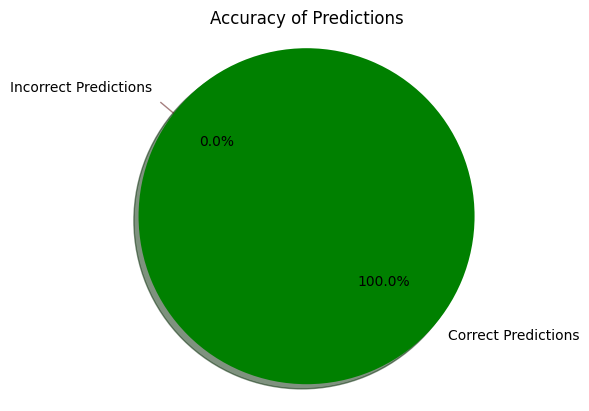

Correct Predictions:
   Transcript_ID Base_Pairs  Length
13   00000374214        432   Small
39   00000629095       1171  Medium
30   00000392830       1763  Medium
45   00000571430        592   Small
17   00000311916       3616   Large
48   00000576834        838   Small
26   00000418289        576   Small
25   00000403094       2344  Medium

Incorrect Predictions:
Empty DataFrame
Columns: [Transcript_ID, Base_Pairs, Length]
Index: []
Accuracy: 1.0


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
correct_predictions = (y_test == y_pred).sum()
incorrect_predictions = len(y_test) - correct_predictions
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_predictions, incorrect_predictions]
colors = ['green', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Accuracy of Predictions')
plt.show()
results_df = pd.DataFrame({
    'True_Label': label_encoder.inverse_transform(y_test),
    'Predicted_Label': label_encoder.inverse_transform(y_pred),
    'Transcript_ID': x_test['Transcript_ID'],
    'Base_Pairs': x_test['Base_Pairs'],
    'Length': label_encoder.inverse_transform(y_test)
})
correct_predictions_df = results_df[results_df['True_Label'] == results_df['Predicted_Label']]
incorrect_predictions_df = results_df[results_df['True_Label'] != results_df['Predicted_Label']]
correct_predictions_df['Transcript_ID'] = correct_predictions_df['Transcript_ID'].str.replace('\t', '')
correct_predictions_df['Length'] = correct_predictions_df['Length'].str.replace('\t', '')
incorrect_predictions_df['Transcript_ID'] = incorrect_predictions_df['Transcript_ID'].str.replace('\t', '')
incorrect_predictions_df['Length'] = incorrect_predictions_df['Length'].str.replace('\t', '')
print("Correct Predictions:")
print(correct_predictions_df[['Transcript_ID', 'Base_Pairs', 'Length']])
print("\nIncorrect Predictions:")
print(incorrect_predictions_df[['Transcript_ID', 'Base_Pairs', 'Length']])
print("Accuracy:", accuracy)


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)
print("Accuracy with best model:", accuracy_best)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy with best model: 1.0
